<a href="https://colab.research.google.com/github/rafaeldajuda/IA-COLAB/blob/main/CLASSIFICARDOR_DE_AVALIACOES_BAG_OF_WORDS_WORD_CLOUD_NLTK_STOP_WORDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICANDO AVALIÇÕES DE TEXTOS

* base de dados: kaggle - buscape
* https://www.kaggle.com/datasets/fredericods/ptbr-sentiment-analysis-datasets

In [1]:
import pandas as pd

avaliacoes = pd.read_csv('b2w.csv')

In [2]:
avaliacoes.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [3]:
# removendo colunas que não precisamos
avaliacoes = avaliacoes.drop(['original_index', 'review_text_processed', 'review_text_tokenized', 'rating', 'kfold_polarity', 'kfold_rating'], axis=1)

In [4]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [5]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_text  132373 non-null  object 
 1   polarity     116058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [6]:
avaliacoes['polarity'].value_counts()

,count
polarity,
1.0,80300
0.0,35758


In [7]:
avaliacoes['polarity'].unique().tolist()

[1.0, 0.0, nan]

* note que existe colunas sem valores na 'polarity'
* como a coluna 'polarity' é um valor binário não é uma má ideia remover as linhas sem valores, assim não iremos enviesar o modelo

In [8]:
# removendo tudo o que não é numero
avaliacoes.dropna(inplace=True, axis=0)

In [9]:
avaliacoes

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
...,...,...
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,1.0
132369,Eu estou muito chateado com isso gostaria que ...,0.0
132371,O produto anunciado no site dizia ser 100% al...,0.0


In [10]:
avaliacoes['polarity'].value_counts()

,count
polarity,
1.0,80300
0.0,35758


* 80300 linhas com avaliçãoes positivas
* 35758 linhas com avaliações negativas

In [11]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, avaliacoes.polarity, test_size=0.2, random_state=71)

In [12]:
classe_teste

,polarity
10925,0.0
58227,1.0
33061,1.0
101270,1.0
88357,1.0
...,...
108682,0.0
83486,1.0
119762,0.0
21044,0.0


In [ ]:
# from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()

# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(f'Acurácia: {acuracia}')

ValueError: could not convert string to float: 'O produto não foi entregue até o presente momento.'

## Bag of Words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Este produto é muito bom', 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [14]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [15]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [16]:
matriz_esparsa

,bom,este,muito,produto,ruim
0,1,1,1,1,0
1,0,1,1,1,1


In [17]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


* 116058 - quantidade de linhas
* 50508 - quantidades de palavras únicas

In [18]:
vetorizar = CountVectorizer(max_features=100) # limitando para as X palavras mais recorrentes
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [19]:
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, random_state=71, stratify=avaliacoes.polarity)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
accuracy = regressao_logistica.score(teste, classe_teste)
print(f'accuracy: {accuracy}')

accuracy: 0.8873686024470102


In [84]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features=100) # limitando para as X palavras mais recorrentes
  bag_of_words = vetorizar.fit_transform(avaliacoes[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes[coluna_sentimento], random_state=71, stratify=avaliacoes[coluna_sentimento])

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

In [85]:
print(treinar_modelo(avaliacoes, 'review_text', 'polarity'))

0.8873686024470102


## Word Cloud

https://github.com/amueller/word_cloud

Representação visual de palavras

In [22]:
from wordcloud import WordCloud

todas_as_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_as_palavras = ' '.join(todas_as_avaliacoes)

In [23]:
len(todas_as_avaliacoes)

116058

In [24]:
len(todas_as_palavras)

16570763

In [25]:
nuvem_de_palavras = WordCloud().generate(todas_as_palavras)

In [26]:
nuvem_de_palavras

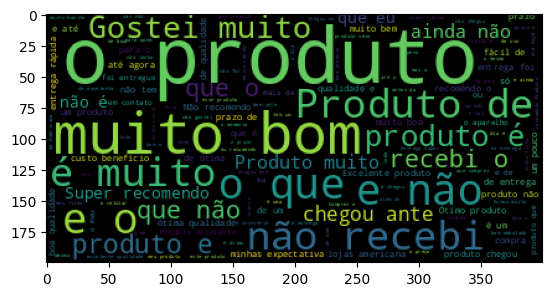

In [27]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_de_palavras)

In [28]:
nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_as_palavras)

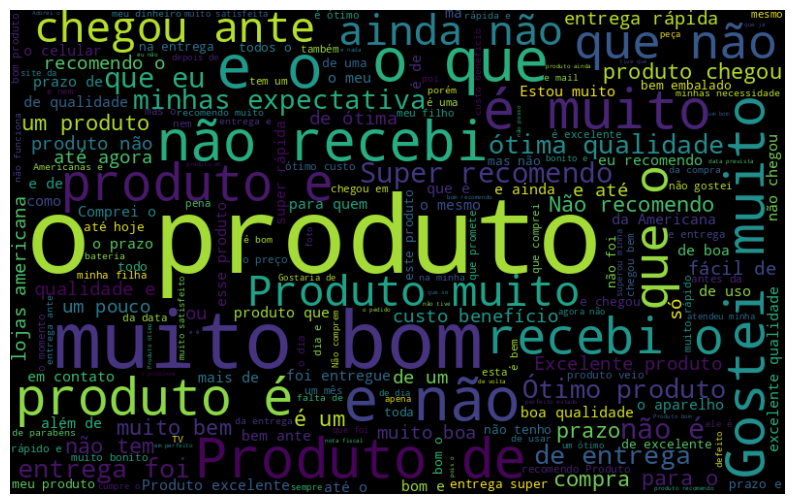

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_de_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

### Criando um word cloud para mensagens positivas e nagetivas

In [30]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query('polarity == 0')
  todas_as_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_as_palavras = ' '.join(todas_as_avaliacoes)
  nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras) # collocations - remove ngrans (o, a, e, é, ...)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_de_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [31]:
def word_cloud_pos(dados, coluna_texto):
  texto_positivo = dados.query('polarity == 1')
  todas_as_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
  todas_as_palavras = ' '.join(todas_as_avaliacoes)
  nuvem_de_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_as_palavras) # collocations - remove ngrans ('o produto' para 'o' 'produto')

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_de_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

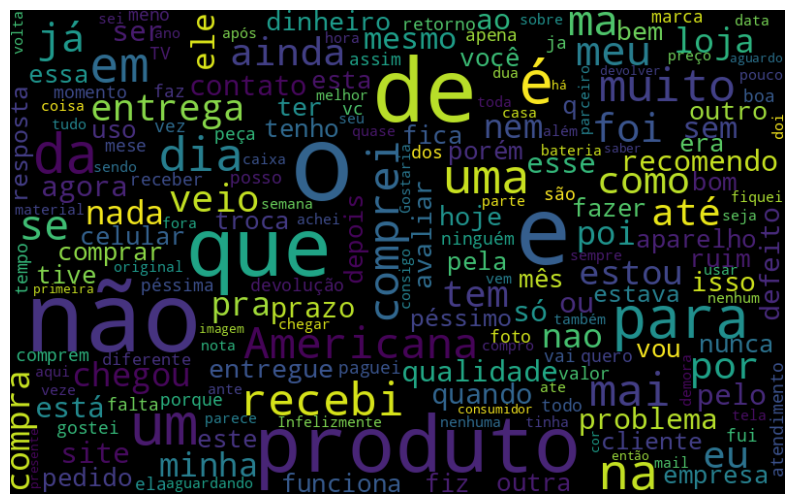

In [32]:
# nuvem de palavras negativa
word_cloud_neg(avaliacoes, 'review_text')

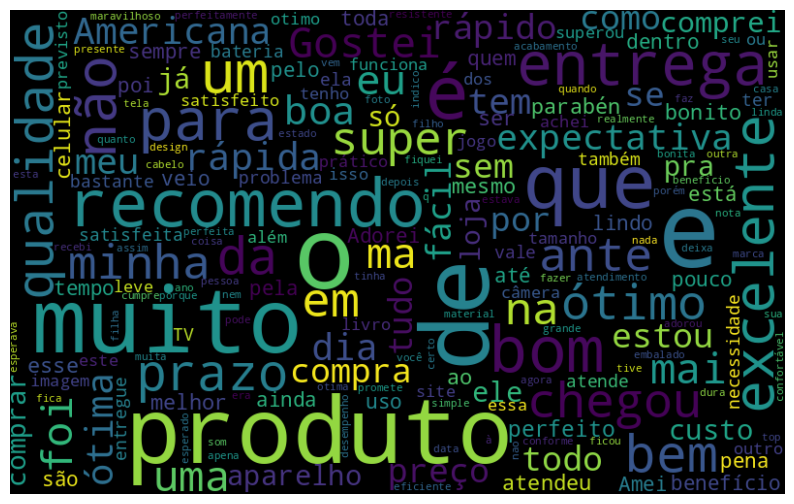

In [33]:
word_cloud_pos(avaliacoes, 'review_text')

## NLTK

* https://www.nltk.org/

In [35]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [36]:
corpus = ['Muito bom este protuo', 'Muito ruim este produto']
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito bom este protuo': 1, 'Muito ruim este produto': 1})

In [37]:
from nltk import tokenize

frase = 'Muito bom este produto'

token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase)
token_frase

['Muito', 'bom', 'este', 'produto']

In [38]:
token_por_espaco = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaco.tokenize(todas_as_palavras)
frequencia = nltk.FreqDist(token_dataset)

In [39]:
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [41]:
dataframe_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia': list(frequencia.values())})

In [42]:
dataframe_frequencia.head()

,Palavra,Frequencia
0,Bem,413
1,macio,216
2,e,89308
3,felpudo...recomendo.,1
4,Preço,334


In [43]:
dataframe_frequencia.nlargest(columns = 'Frequencia', n=10)

,Palavra,Frequencia
2,e,89308
20,o,76053
17,de,75791
39,a,66640
50,que,53574
33,não,44253
23,do,36776
43,muito,36566
60,é,36314
21,produto,34983


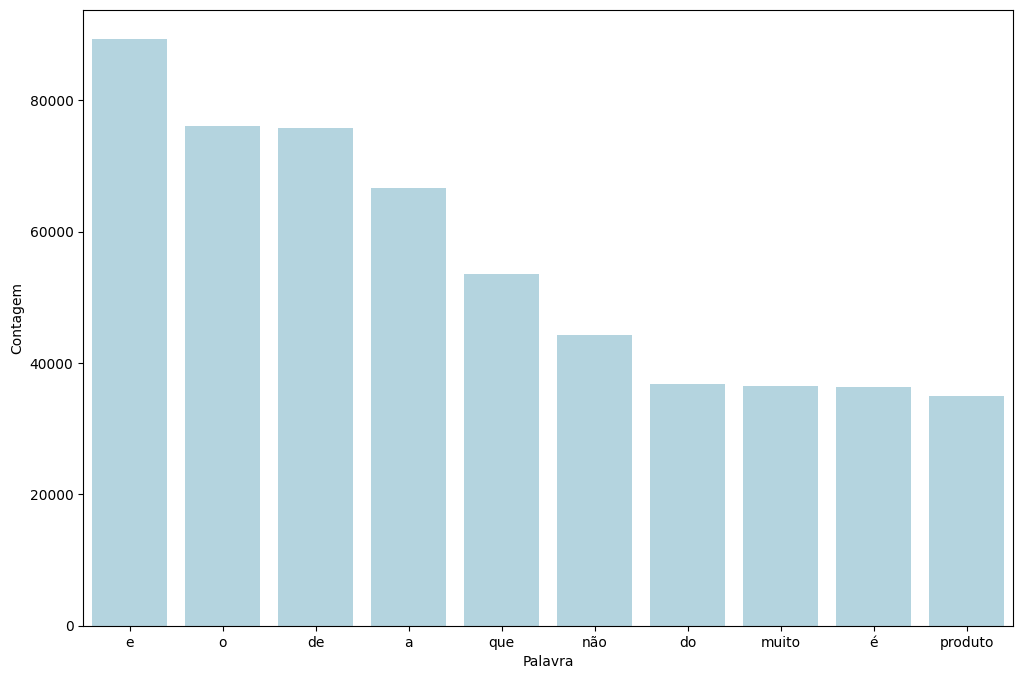

In [45]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data=dataframe_frequencia.nlargest(columns='Frequencia', n=10), x='Palavra', y='Frequencia', color='lightblue')
ax.set(ylabel='Contagem')
plt.show()

In [46]:
def grafico(dados, coluna_texto, quantidade):
  todas_as_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_frase = token_por_espaco.tokenize(todas_as_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()), 'Frequencia': list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns = 'Frequencia', n=quantidade)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=dataframe_frequencia, x='Palavra', y='Frequencia', color='lightblue')
  ax.set(ylabel='Contagem')
  plt.show()

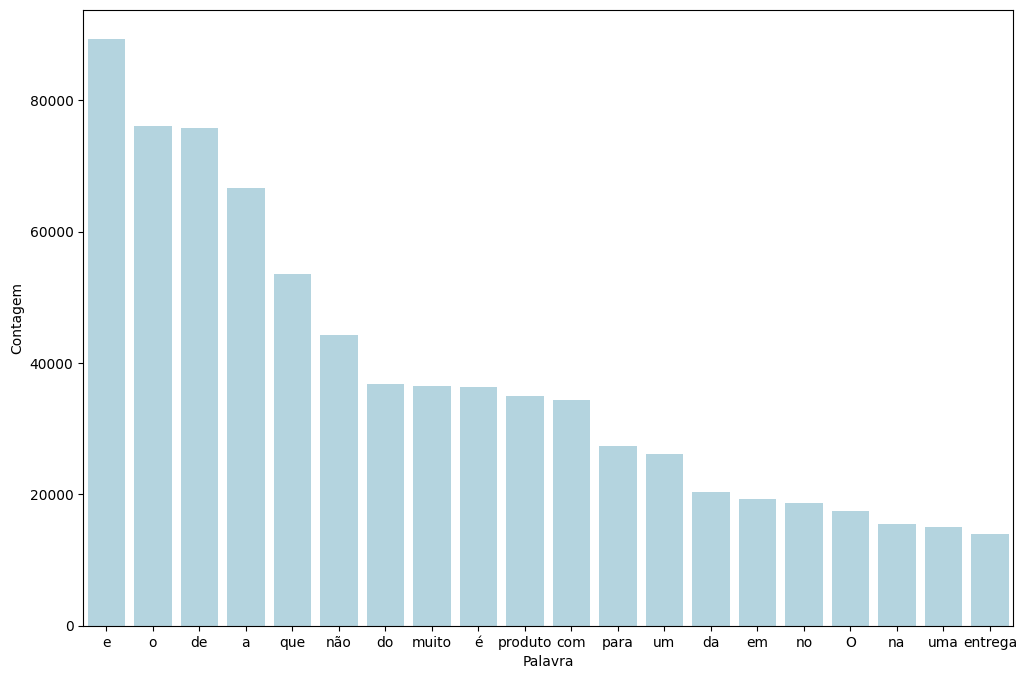

In [47]:
grafico(avaliacoes, 'review_text', 20)

## REMOÇÃO DE STOP WORDS

In [48]:
palavras_indesejadas = nltk.corpus.stopwords.words('portuguese')
palavras_indesejadas

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [51]:
frase_processada = list()

for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao)

  for palavra in palavras_texto:
    if palavra not in palavras_indesejadas:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords'] = frase_processada

In [52]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco..."


In [86]:
# novo modelo sem stop words
treinar_modelo(avaliacoes, 'texto_sem_stopwords', 'polarity')

0.8790970187833879

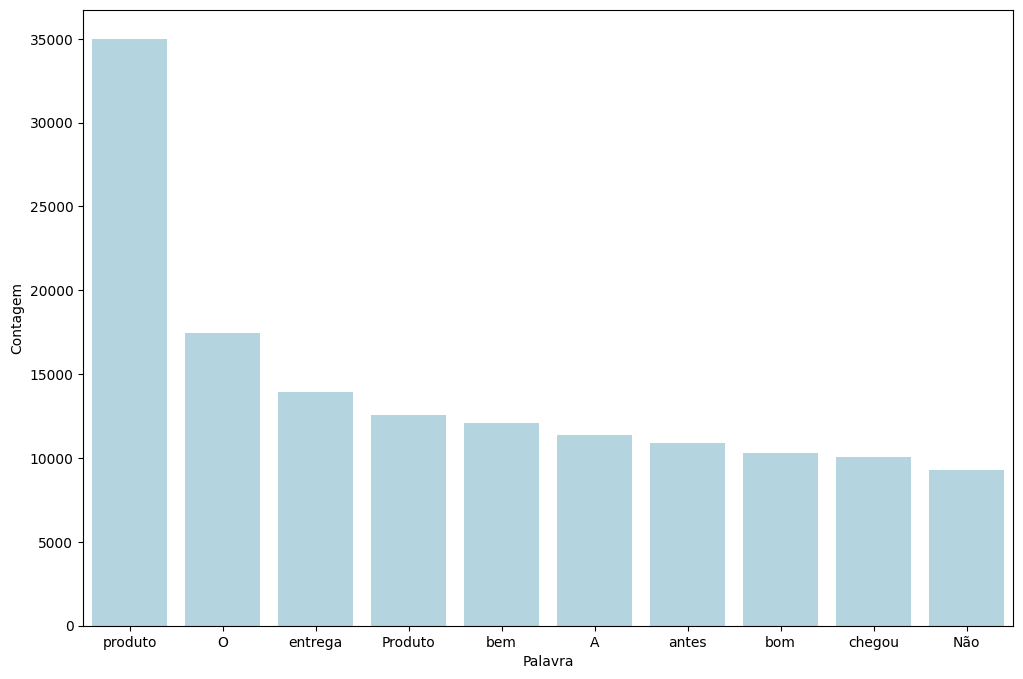

In [54]:
grafico(avaliacoes, 'texto_sem_stopwords', 10)

In [55]:
# romovendo pontuações

from nltk import tokenize

frase = 'Muito bom, este produto.'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [57]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [60]:
pontuacao_stopwords = pontuacao + palavras_indesejadas

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)

  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao'] = frase_processada

In [62]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...


In [64]:
avaliacoes.texto_sem_stopwords[5]

'ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom'

In [65]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

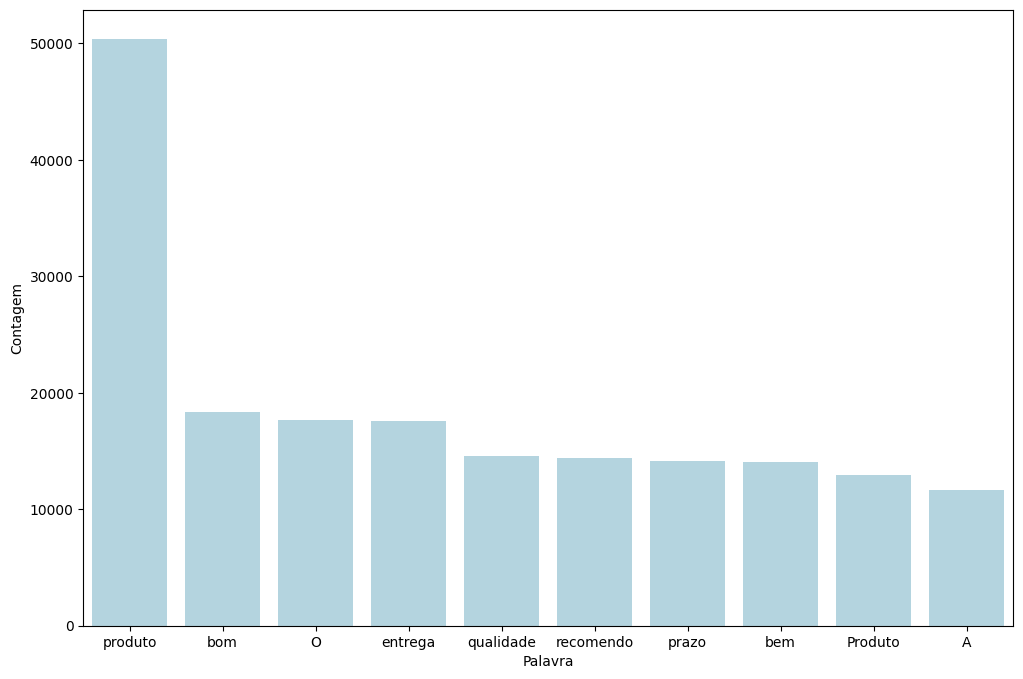

In [69]:
grafico(avaliacoes, 'texto_sem_stopwords_e_pontuacao', 10)

In [70]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 7.9 MB/s eta 0:00:00


In [71]:
import unidecode

acentos = 'ótimo péssimo não tão é'

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao tao e'

In [72]:
sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]

In [73]:
sem_acentos[4]

'otmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [75]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [77]:
stop_words_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stop_words_sem_acentos

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [78]:
avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos'] = sem_acentos

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)

  for palavra in palavras_texto:
    if palavra not in stop_words_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos'] = frase_processada

In [79]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao,texto_sem_stopwords_e_pontuacao_e_acentos
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,Bem macio felpudo ... recomendo Preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,Produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,Bom custo beneficio Adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...


In [87]:
# modelo sem stop words (mais acentos)
treinar_modelo(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos', 'polarity')

0.8824745821127004

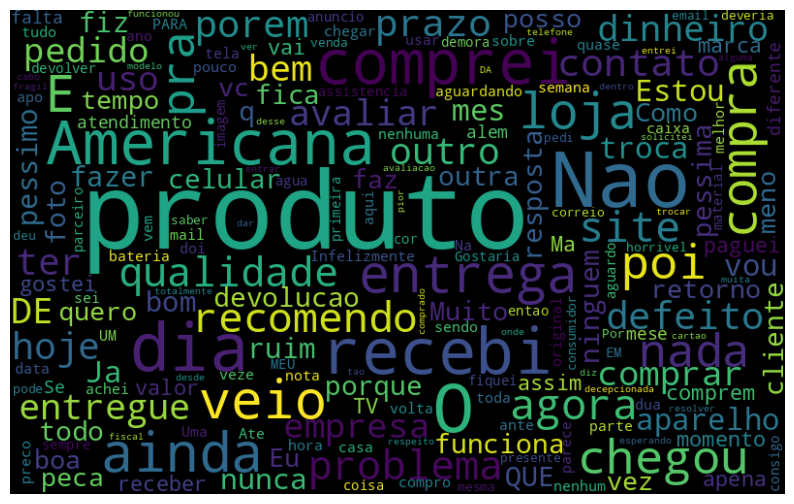

In [88]:
word_cloud_neg(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos')

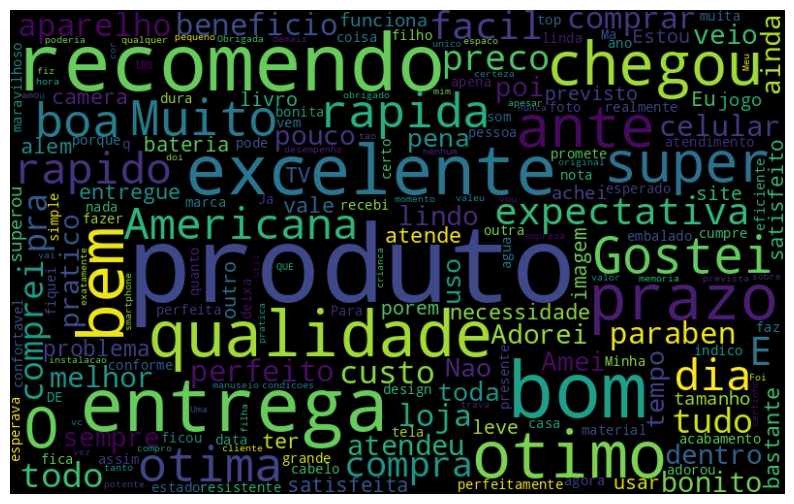

In [89]:
word_cloud_pos(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos')

In [90]:
frase = 'O Rato Roeu A Roupa do Rei de Roma'
print(frase.lower())

o rato roeu a roupa do rei de roma


In [91]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto = token_pontuacao.tokenize(avaliacao)

  for palavra in palavras_texto:
    if palavra not in stop_words_sem_acentos:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes['texto_sem_stopwords_e_pontuacao_e_acentos_minusculos'] = frase_processada

In [92]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao,texto_sem_stopwords_e_pontuacao_e_acentos,texto_sem_stopwords_e_pontuacao_e_acentos_minusculos
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...,Bem macio felpudo ... recomendo Preco imbative...,bem macio felpudo ... recomendo preco imbative...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,Produto excepcional recomendo !!! inovador gos...,produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...,Bom custo beneficio Adequado pessoas fazem uso...,bom custo beneficio adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...,otmo produto atendeu expectativas entrega ocor...


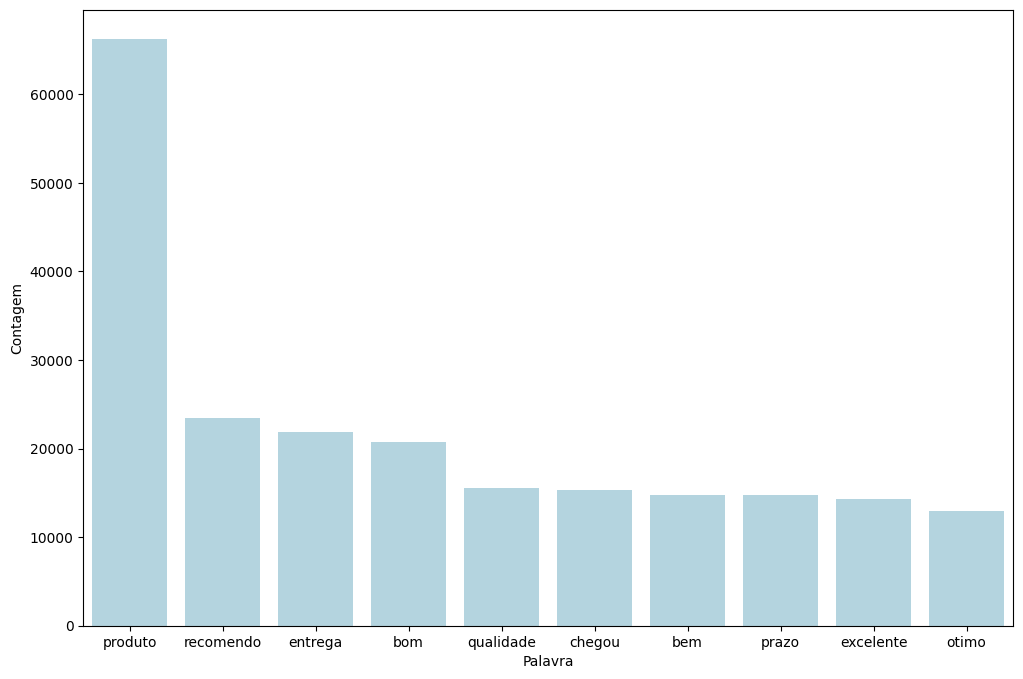

In [93]:
grafico(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculos', 10)

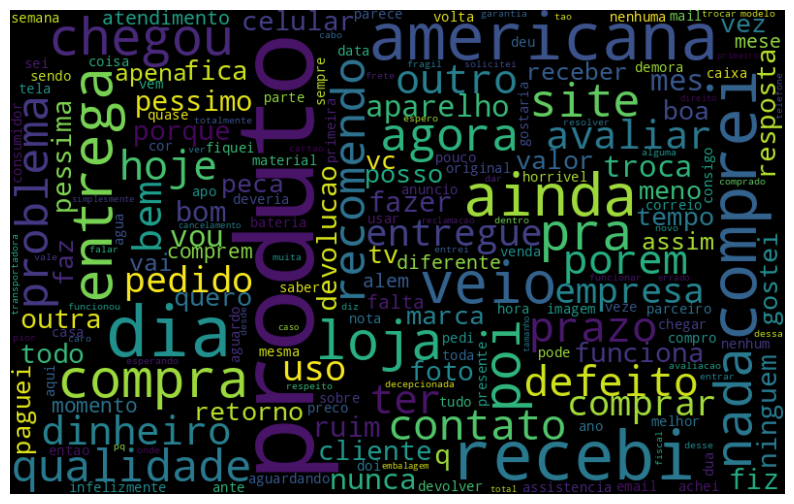

In [94]:
word_cloud_neg(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculos')

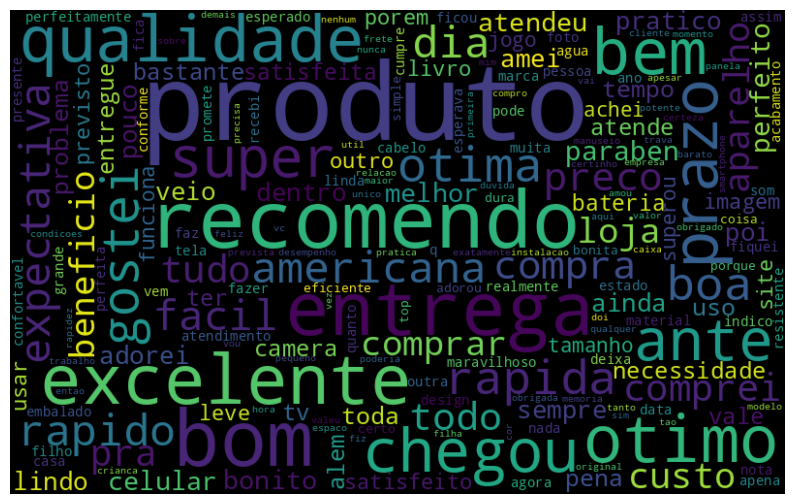

In [95]:
word_cloud_pos(avaliacoes, 'texto_sem_stopwords_e_pontuacao_e_acentos_minusculos')